In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1=pd.read_csv('E:/project/dataset/t243 cleaned/final_T243_zero.csv', low_memory=False)
df1.head(10)

,Unnamed: 0,timestamp,ConfigProcTime,ConfigReturnPressure,ConfigDrawPressure,ConfigCustomRatio,ConfigPlasmaRatio,ConfigPlasmaRinseback,ConfigSalineRinseback,ConfigAuditTracking,...,RBCStorageBag,ACTotalVol,QnCmd,QnAct,InletRPM,ACRPM,PlasmaRPM,CollectRPM,PasSubState,QchEffActual
0,0,2018/01/30_14:56:19.797,280.0,-250.0,10.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,1,2018/01/30_14:56:55.061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,2,2018/01/30_14:56:55.195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,3,2018/01/30_14:56:55.196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,4,2018/01/30_14:56:55.198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
5,5,2018/01/30_14:56:55.460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
6,6,2018/01/30_14:57:15.863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
7,7,2018/01/30_14:57:16.398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
8,8,2018/01/30_14:57:16.909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
9,9,2018/01/30_14:57:17.398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [3]:
df2=df1.iloc[:,58]
df2

0         0
1         0
2         0
3         F
4         0
         ..
185971    0
185972    0
185973    0
185974    H
185975    0
Name: AlarmStateFlag, Length: 185976, dtype: object

In [4]:
text_data = ' '.join([str(elem) for elem in df2])
text_data

'0 0 0 F 0 E 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 L 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 H L 0 0 0 0 0 0 0 E L 0 0 0 0 0 0 0 0 0 0 0 0 0 H 0 L 0 0 0 0 E 0 L 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 H 0 L 0 0 0 E 0 L 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 H 0 L 0 0 E 0 L 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 H 0 L 0 0 0 E 0 L 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 H 0 L 0 0 0 E 0 L 0 0 0 0 0 0 0 0 0 0 0 0 0 H 0 L 0 0 0 E 0 L 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 H 0 L 0 0 0 0 0 E 0 L 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 H 0 L 0 0 0 0 0 E 0 L 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

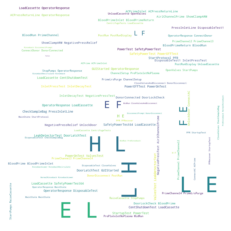

In [5]:
wordcloud = WordCloud(max_font_size=100, max_words=10000,stopwords=STOPWORDS, background_color="white", width=1000, height=1000).generate(text_data)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [6]:
# wordcloud.to_file("E:/dataset/wordcloud_t243-cleaned1.png")